### 导入库

In [1]:
import os,shutil
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.optimizers import SGD, RMSprop, Adam
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

Using TensorFlow backend.


### 查看数据集

In [2]:
base_dir = './'
train1_dir = os.path.join(base_dir, 'train1')
print('tatal training machine images:', len(os.listdir(train1_dir)))
validation1_dir = os.path.join(base_dir, 'validation1')
print('tatal validation machine images:', len(os.listdir(validation1_dir)))
train_on_dir = os.path.join(base_dir, 'on')
print('tatal on machine images:', len(os.listdir(train_on_dir)))
train_off_dir = os.path.join(base_dir, 'off')
print('tatal off machine images:', len(os.listdir(train_off_dir)))

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_on_dir = os.path.join(base_dir, 'train/on')
train_off_dir = os.path.join(base_dir, 'train/off')

tatal training machine images: 28
tatal validation machine images: 22
tatal on machine images: 25
tatal off machine images: 25


### 构建卷及神经网络

In [3]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))#网络将输出在２个不同输出类别上的概率分布——对于每一个输入样本，
                                         #网络都会输出一个２维向量，其中output[i]是样本属于第i个类别的概率。
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

### 每一层的参数

In [4]:
#特征图维度随每层的变化
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 23, 23, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 33856)             0         
__________

### 数据增强生成器

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

In [6]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
fnames = [os.path.join(train_on_dir, fname) for
         fname in os.listdir(train_on_dir)]
img_path = fnames[3]

img = image.load_img(img_path, target_size=(100,100))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

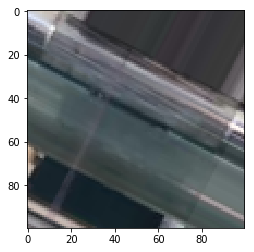

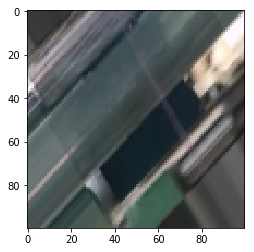

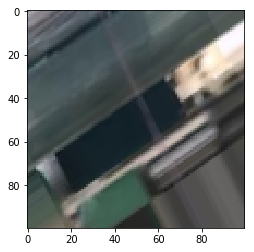

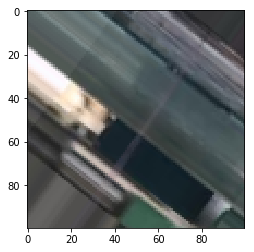

In [8]:
i = 0
for batch in train_datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
        
plt.show()

In [9]:
#训练模型
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(100,100),
        batch_size=32,)

Found 28 images belonging to 2 classes.


In [10]:
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(100,100),
        batch_size=32,)

Found 22 images belonging to 2 classes.


In [11]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
#返回一个history对象，字典里包含训练过程中的所有数据
history = model.fit_generator(
      train_generator,
      steps_per_epoch=10,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/100
10/10 [==============================] - 24s 2s/step - loss: 0.6822 - acc: 0.5857 - val_loss: 0.6717 - val_acc: 0.5909
Epoch 2/100
10/10 [==============================] - 6s 633ms/step - loss: 0.6592 - acc: 0.6107 - val_loss: 0.6469 - val_acc: 1.0000
Epoch 3/100
10/10 [==============================] - 6s 602ms/step - loss: 0.6316 - acc: 0.6464 - val_loss: 0.6309 - val_acc: 0.6818
Epoch 4/100
10/10 [==============================] - 6s 603ms/step - loss: 0.6398 - acc: 0.6286 - val_loss: 0.5887 - val_acc: 1.0000
Epoch 5/100
10/10 [==============================] - 6s 621ms/step - loss: 0.5932 - acc: 0.6643 - val_loss: 0.5708 - val_acc: 1.0000
Epoch 6/100
10/10 [==============================] - 6s 603ms/step - loss: 0.6269 - acc: 0.6250 - val_loss: 0.5541 - val_acc: 0.7727
Epoch 7/100
10/10 [==============================] - 6s 600ms/step - loss: 0.5929 - acc: 0.7036 - val_loss: 0.5167 - val_acc: 1.0000
Epoch 8/100
10/10 [==============================] - 6s 622ms/step - lo

In [12]:
#保存模型
model.save('./on_and_off1.h5', overwrite=True)

In [13]:
#在测试集上评估这个模型
validation_loss, validation_acc = model.evaluate_generator(validation_generator, steps=50)
print('validation acc:', validation_acc)

validation acc: 1.0


In [18]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(100,100),
        batch_size=32,)

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 24 images belonging to 2 classes.
test acc: 1.0


### 绘制结果

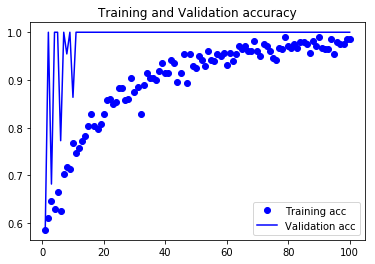

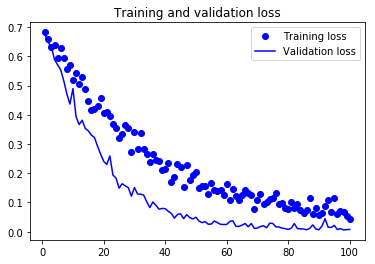

In [15]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss , 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 平滑曲线

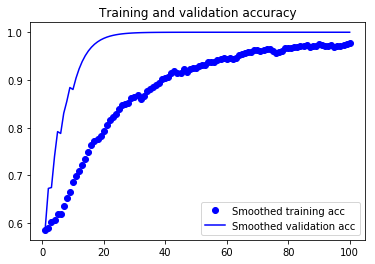

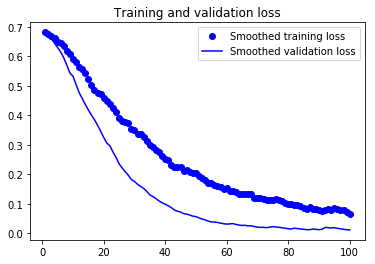

In [16]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()


plt.show()